In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_012_health_indicators_BRFSS2015 (2).csv to diabetes_012_health_indicators_BRFSS2015 (2).csv


In [ ]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015 (2).csv')
print(data.describe())
print(data.isnull().sum())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

class_weights = compute_class_weight('balanced', classes=[0, 1, 2], y=y)
class_weight_dict = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2]}

In [ ]:
y_categorical = pd.get_dummies(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(21, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(3, activation='softmax'))
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weight_dict)

Epoch 1/10
6342/6342 [==============================] - 26s 4ms/step - loss: 1.0785 - accuracy: 0.5815 - val_loss: 0.9776 - val_accuracy: 0.6283
Epoch 2/10
6342/6342 [==============================] - 19s 3ms/step - loss: 0.9765 - accuracy: 0.6241 - val_loss: 0.8255 - val_accuracy: 0.6458
Epoch 3/10
6342/6342 [==============================] - 18s 3ms/step - loss: 0.9682 - accuracy: 0.6251 - val_loss: 0.8886 - val_accuracy: 0.6354
Epoch 4/10
6342/6342 [==============================] - 19s 3ms/step - loss: 0.9620 - accuracy: 0.6265 - val_loss: 0.8828 - val_accuracy: 0.6631
Epoch 5/10
6342/6342 [==============================] - 21s 3ms/step - loss: 0.9594 - accuracy: 0.6223 - val_loss: 0.9225 - val_accuracy: 0.5964
Epoch 6/10
6342/6342 [==============================] - 18s 3ms/step - loss: 0.9574 - accuracy: 0.6187 - val_loss: 0.8351 - val_accuracy: 0.6629
Epoch 7/10
6342/6342 [==============================] - 19s 3ms/step - loss: 0.9556 - accuracy: 0.6193 - val_loss: 0.8350 - val_ac

In [ ]:
import numpy as np

In [ ]:
y_pred_probabilities = nn_model.predict(X_test)
y_pred_nn = np.argmax(y_pred_probabilities, axis=1)

print("Weighted Neural Network Classification Report:\n", classification_report(y_test.idxmax(axis=1), y_pred_nn))

1586/1586 [==============================] - 5s 3ms/step
Weighted Neural Network Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.65      0.77     42795
         1.0       0.03      0.47      0.06       944
         2.0       0.39      0.44      0.41      6997

    accuracy                           0.62     50736
   macro avg       0.46      0.52      0.41     50736
weighted avg       0.86      0.62      0.71     50736



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test.idxmax(axis=1), y_pred_nn, average='weighted')
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1_score:.4f}")

Weighted Precision: 0.8613
Weighted Recall: 0.6151
Weighted F1 Score: 0.7090


In [ ]:
weights = nn_model.layers[0].get_weights()[0]
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': weights.mean(axis=0)})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

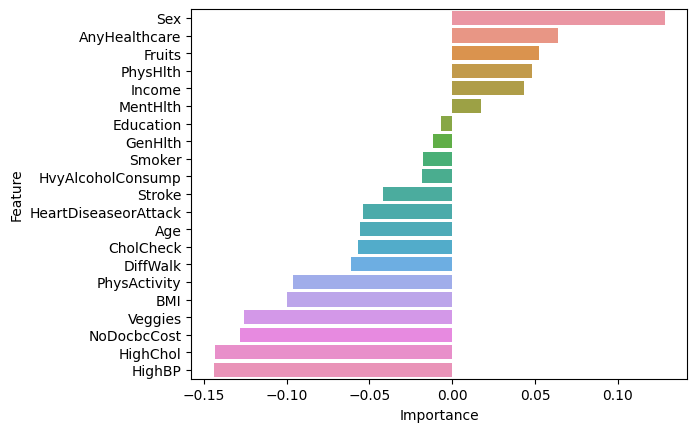

In [ ]:
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.show()